In [1]:
### keep the imports
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import random

In [2]:
# pre process and normalize
# no missing data :)!!
df = pd.read_csv("data.csv.data")
df = df[["ACD", "AL", "WTW", "K1", "K2", "Correto"]]

df["ACD"] = df["ACD"].apply(lambda x: x.replace(",", '.')).apply(float)
df["AL"] = df["AL"].apply(lambda x: x.replace(",", '.')).apply(float)
df["WTW"] = df["WTW"].apply(lambda x: x.replace(",", '.')).apply(float)
df["K1"] = df["K1"].apply(lambda x: x.replace(",", '.')).apply(float)
df["K2"] = df["K2"].apply(lambda x: x.replace(",", '.')).apply(float)
df["Correto"] = df["Correto"].apply(lambda x: 1 if x == 'S'  else 0)


columns = ["ACD", "AL", "WTW", "K1", "K2"]
df.head()


ACD     AL   WTW     K1     K2  Correto
0  3.32  23.79  12.0  43.60  44.29        1
1  3.39  24.60  12.3  42.03  43.95        1
2  3.51  24.59  12.3  42.83  43.05        1
3  2.96  24.04  12.0  42.35  42.83        1
4  2.44  24.80  12.2  41.01  41.67        1

In [3]:
df.describe()

ACD           AL          WTW           K1           K2  \
count  1528.000000  1528.000000  1528.000000  1528.000000  1528.000000   
mean      3.106728    23.486525    11.975098    43.469188    44.370386   
std       0.428881     1.142280     0.431712     1.745504     1.767765   
min       1.130000    20.150000     9.900000    30.930000    33.950000   
25%       2.830000    22.760000    11.700000    42.450000    43.270000   
50%       3.080000    23.360000    12.000000    43.490000    44.290000   
75%       3.360000    24.080000    12.300000    44.530000    45.490000   
max       5.230000    30.960000    13.300000    49.410000    52.410000   

           Correto  
count  1528.000000  
mean      0.708115  
std       0.454778  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

<Axes: ylabel='Frequency'>

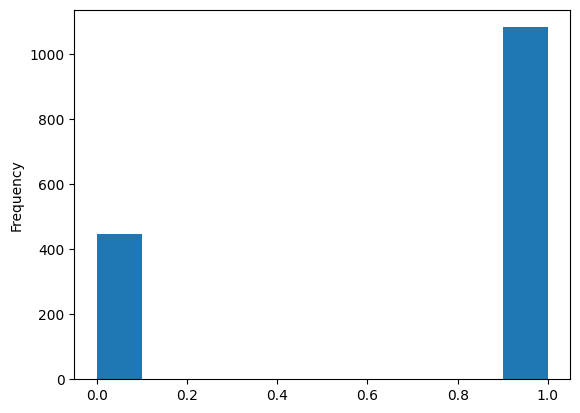

In [4]:
#Just check balance and relation
df['Correto'].plot(kind="hist")

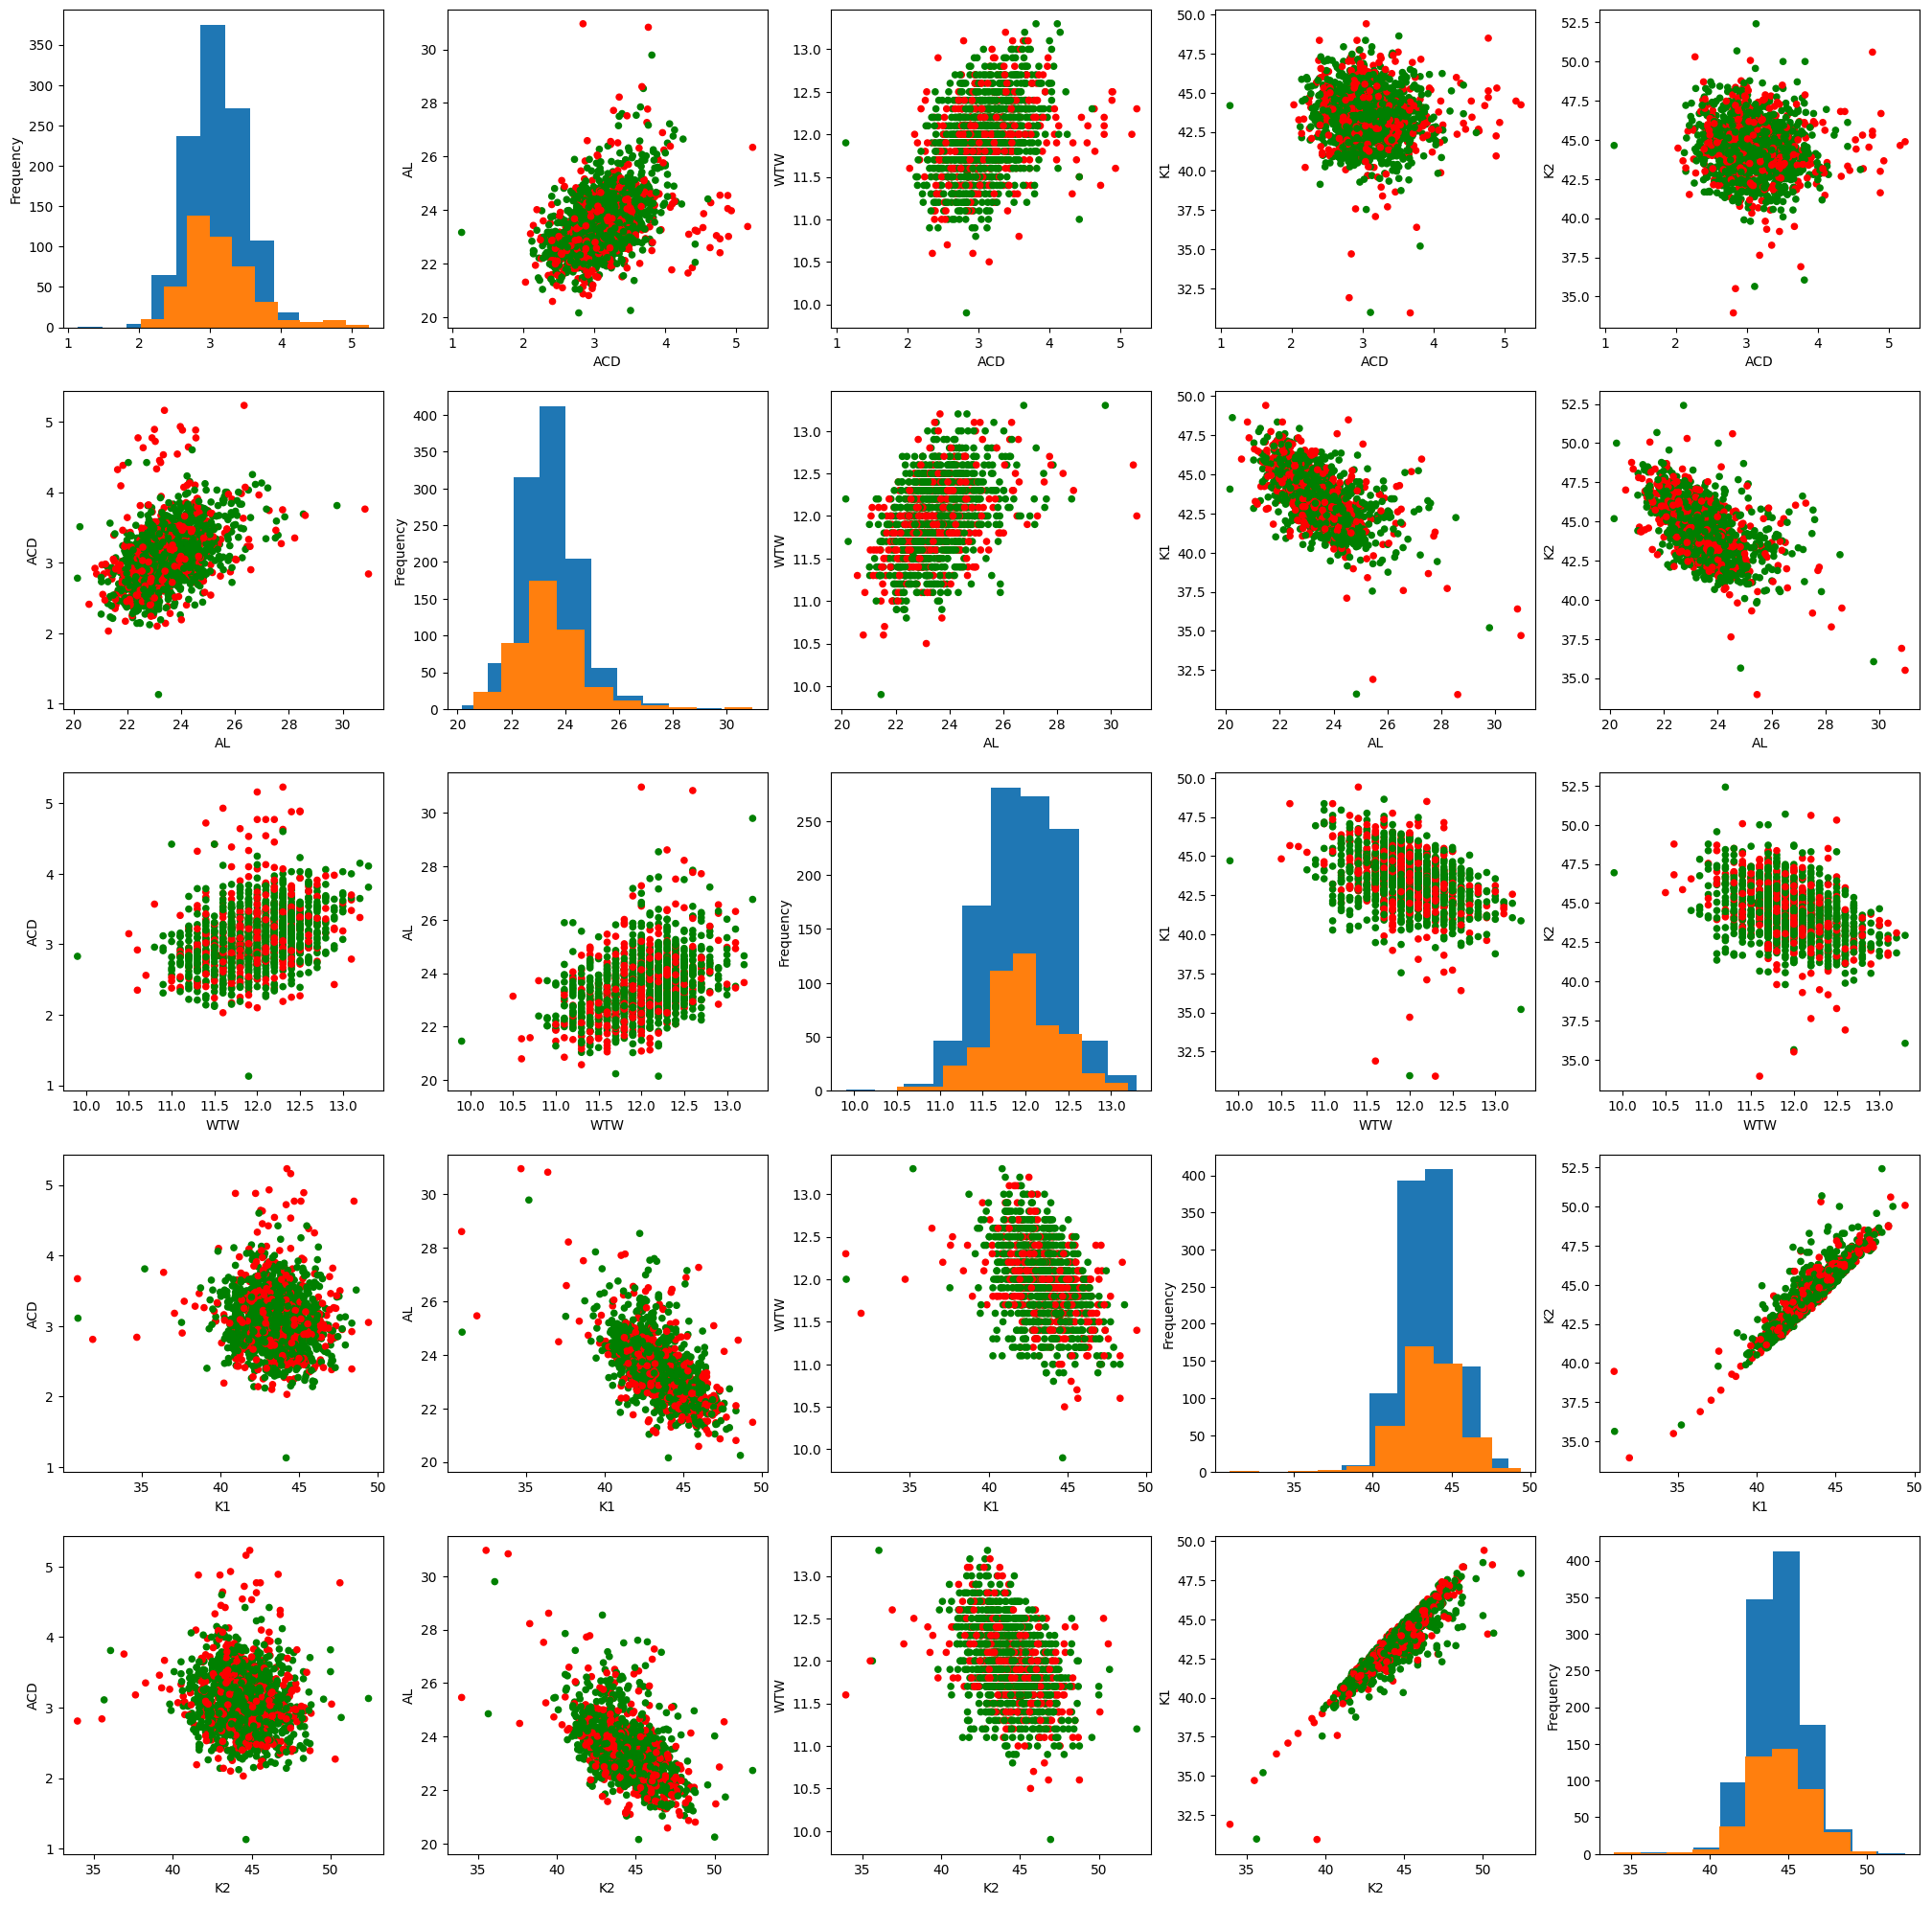

In [5]:
gs = GridSpec(nrows=len(columns), ncols=len(columns))
fig = plt.figure(figsize=(25, 25))
for idx, colum in enumerate(columns):
    for idx2, colum2 in enumerate(columns):
        if colum == colum2:
            ax = fig.add_subplot(gs[idx, idx2])
            df[df["Correto"] == 1][colum].plot.hist(ax=ax)
            df[df["Correto"] == 0][colum].plot.hist(ax=ax)
            pass
        else:
            ax = fig.add_subplot(gs[idx, idx2])
            df.plot.scatter(x=colum, y=colum2, c=df["Correto"].apply(lambda x: "green" if x else "red"), ax=ax)

O cálculo da lente intraocular a ser utilizada foi determinado pela biometria óptica IOL Master 500® com seleção da lente que resultasse em refração nula ou negativa mais próxima da emetropia. Para isso, foram utilizadas três fórmulas, de acordo com o comprimento axial: Hoffer-Q (< 22,00mm), Holladay 1 (entre 22,00mm e 24,50mm) e SRK/T (> 24,50mm). 

In [6]:
## check  22
df_2200 = df[df["AL"] < 22]
df_2200.describe()


ACD         AL        WTW         K1         K2    Correto
count  99.000000  99.000000  99.000000  99.000000  99.000000  99.000000
mean    2.814040  21.588687  11.588889  45.481818  46.615253   0.565657
std     0.408231   0.368750   0.401245   1.583176   1.473024   0.498193
min     2.030000  20.150000   9.900000  41.010000  42.880000   0.000000
25%     2.520000  21.415000  11.400000  44.440000  45.730000   0.000000
50%     2.780000  21.680000  11.600000  45.670000  46.750000   1.000000
75%     2.970000  21.865000  11.900000  46.550000  47.570000   1.000000
max     4.380000  21.990000  12.300000  49.410000  50.680000   1.000000

<Axes: ylabel='Frequency'>

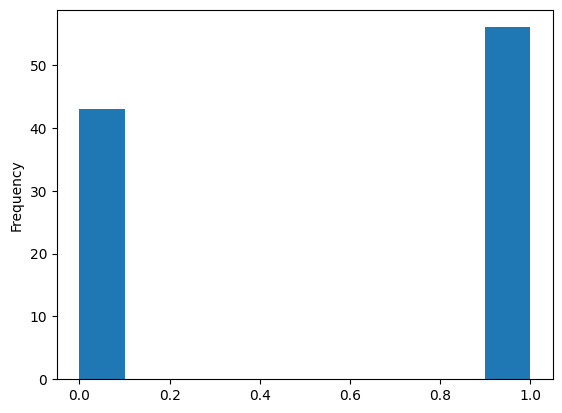

In [7]:
df_2200['Correto'].plot(kind="hist")

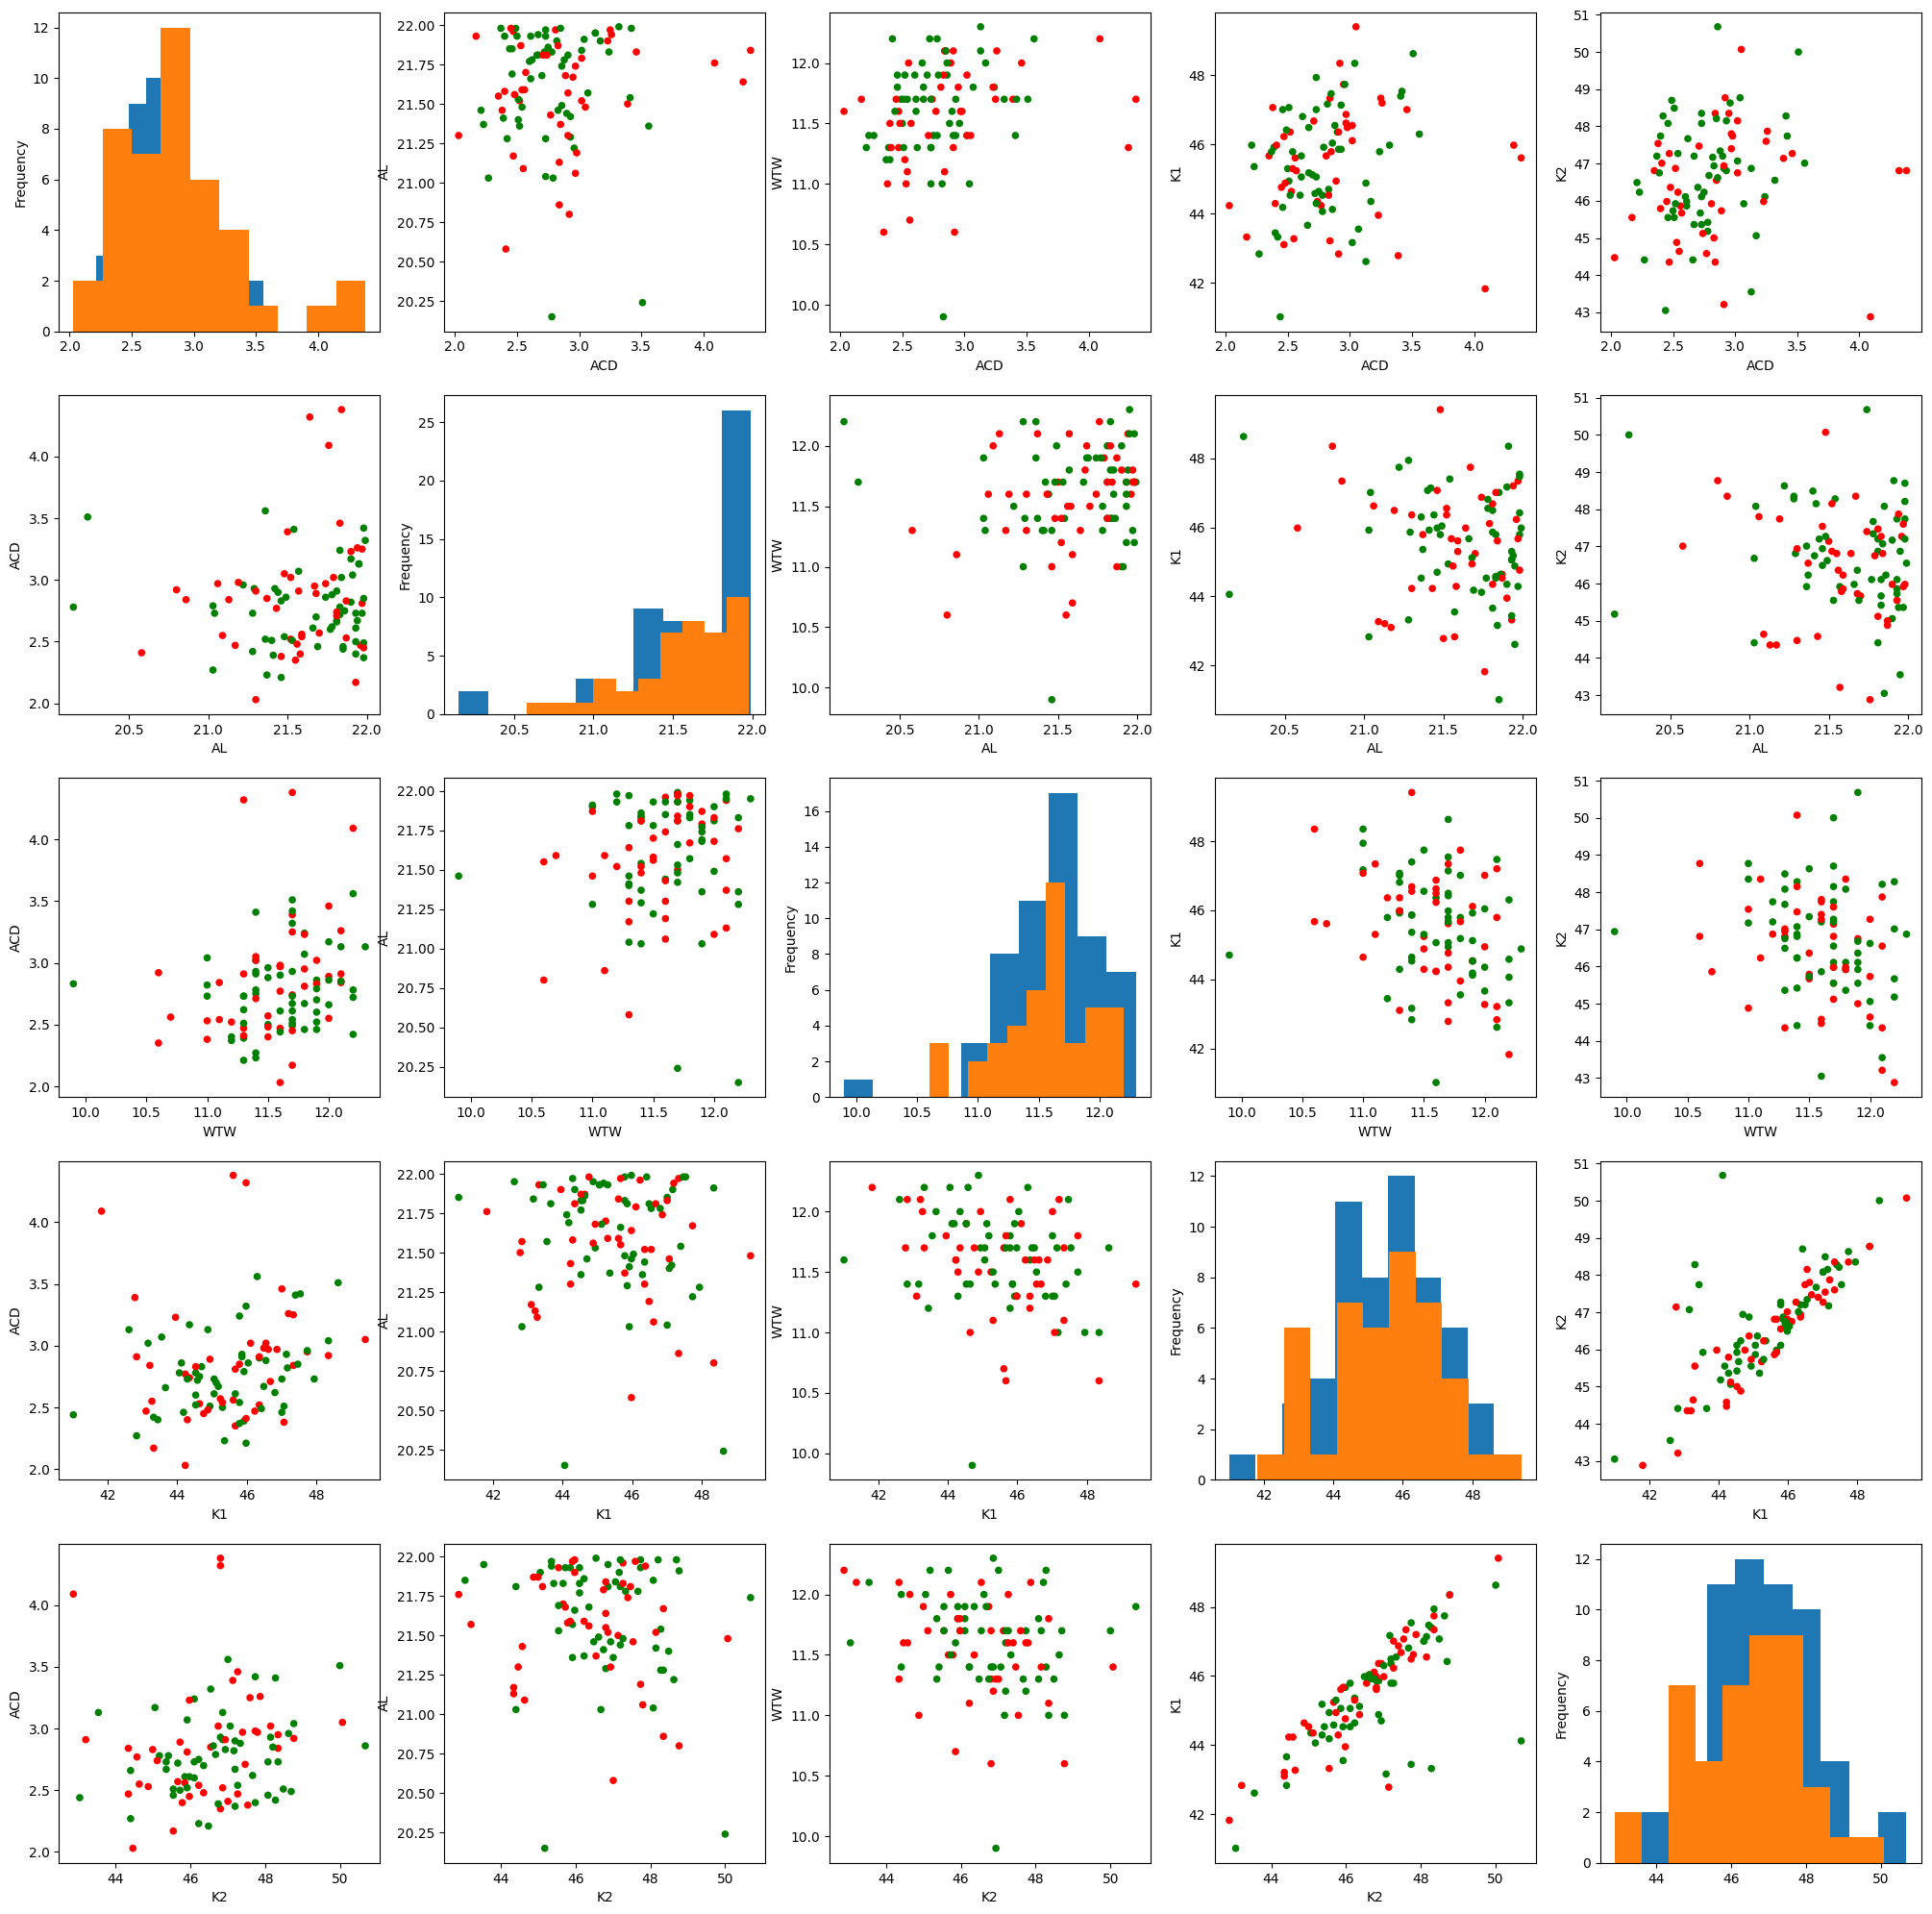

In [8]:
gs = GridSpec(nrows=len(columns), ncols=len(columns))
fig = plt.figure(figsize=(25, 25))
for idx, colum in enumerate(columns):
    for idx2, colum2 in enumerate(columns):
        if colum == colum2:
            ax = fig.add_subplot(gs[idx, idx2])
            df_2200[df_2200["Correto"] == 1][colum].plot.hist(ax=ax)
            df_2200[df_2200["Correto"] == 0][colum].plot.hist(ax=ax)
            pass
        else:
            ax = fig.add_subplot(gs[idx, idx2])
            df_2200.plot.scatter(x=colum, y=colum2, c=df_2200["Correto"].apply(lambda x: "green" if x else "red"), ax=ax)

In [9]:
df_2200_2450 = df[(df["AL"] > 22) & (df["AL"] < 24.50)]
df_2200_2450.describe()

ACD           AL          WTW           K1           K2  \
count  1192.000000  1192.000000  1192.000000  1192.000000  1192.000000   
mean      3.071619    23.278171    11.956502    43.594732    44.452852   
std       0.402016     0.626395     0.406338     1.406447     1.484432   
min       1.130000    22.020000    10.500000    37.090000    37.630000   
25%       2.820000    22.790000    11.700000    42.720000    43.477500   
50%       3.040000    23.260000    12.000000    43.575000    44.395000   
75%       3.290000    23.770000    12.200000    44.530000    45.360000   
max       5.160000    24.490000    13.200000    48.350000    52.410000   

           Correto  
count  1192.000000  
mean      0.725671  
std       0.446363  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

<Axes: ylabel='Frequency'>

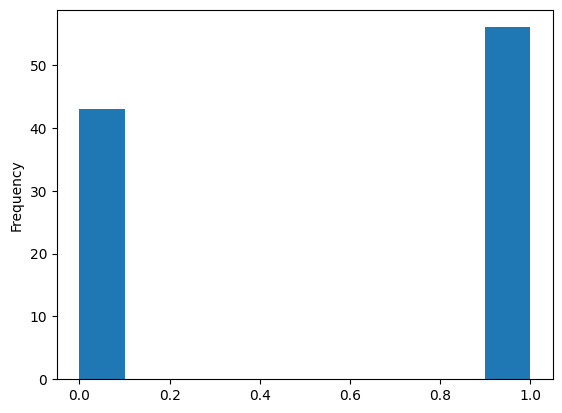

In [10]:
df_2200['Correto'].plot(kind="hist")

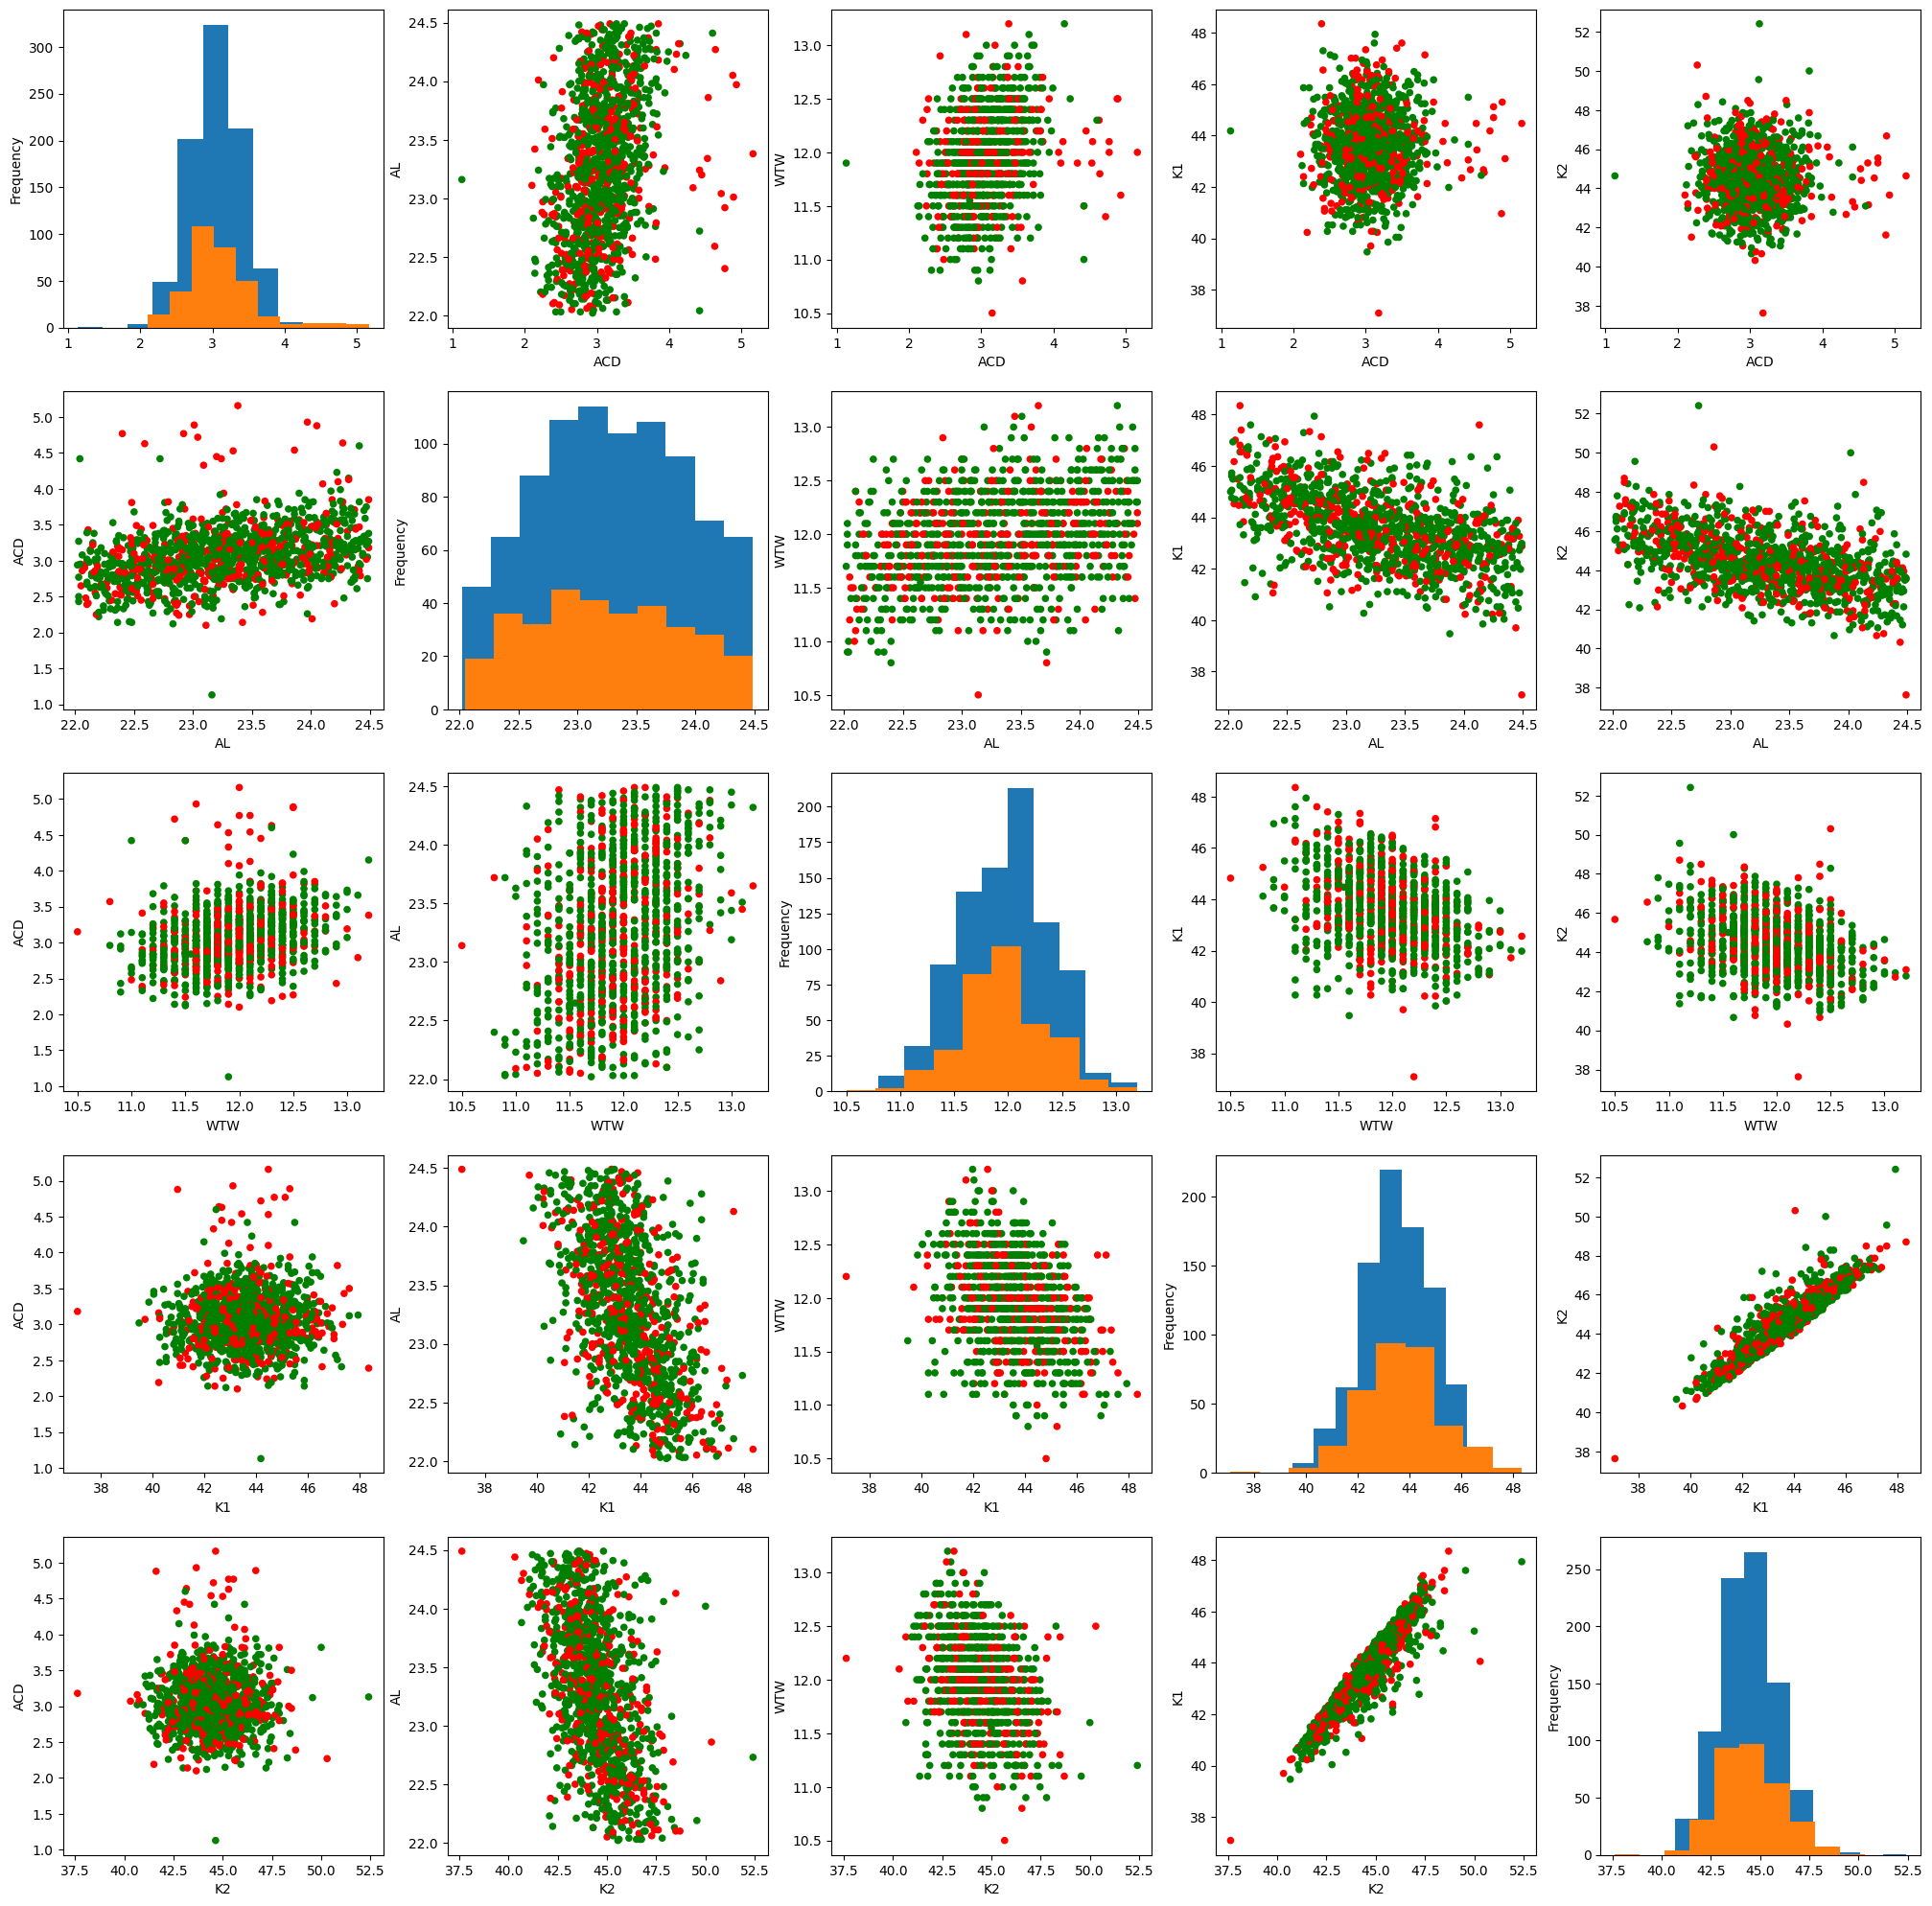

In [11]:
gs = GridSpec(nrows=len(columns), ncols=len(columns))
fig = plt.figure(figsize=(25, 25))
for idx, colum in enumerate(columns):
    for idx2, colum2 in enumerate(columns):
        if colum == colum2:
            ax = fig.add_subplot(gs[idx, idx2])
            df_2200_2450[df_2200_2450["Correto"] == 1][colum].plot.hist(ax=ax)
            df_2200_2450[df_2200_2450["Correto"] == 0][colum].plot.hist(ax=ax)
            pass
        else:
            ax = fig.add_subplot(gs[idx, idx2])
            df_2200_2450.plot.scatter(x=colum, y=colum2, c=df_2200_2450["Correto"].apply(lambda x: "green" if x else "red"), ax=ax)

In [12]:
df_2450 = df[df["AL"] > 24.50]
df_2450.describe()

ACD          AL         WTW          K1          K2     Correto
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.000000
mean     3.408826   25.406739   12.240435   41.919696   42.946478    0.678261
std      0.417235    1.028647    0.414550    2.155421    2.022759    0.468162
min      2.400000   24.510000   11.100000   30.930000   33.950000    0.000000
25%      3.122500   24.712500   12.000000   41.070000   41.870000    0.000000
50%      3.405000   25.030000   12.200000   42.130000   43.050000    1.000000
75%      3.677500   25.790000   12.500000   42.990000   43.950000    1.000000
max      5.230000   30.960000   13.300000   48.490000   50.600000    1.000000

<Axes: ylabel='Frequency'>

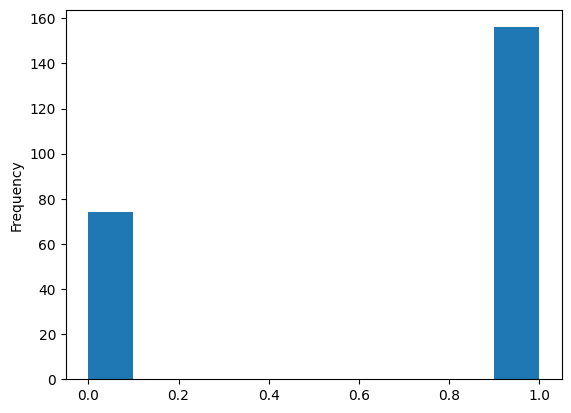

In [13]:
df_2450['Correto'].plot(kind="hist")

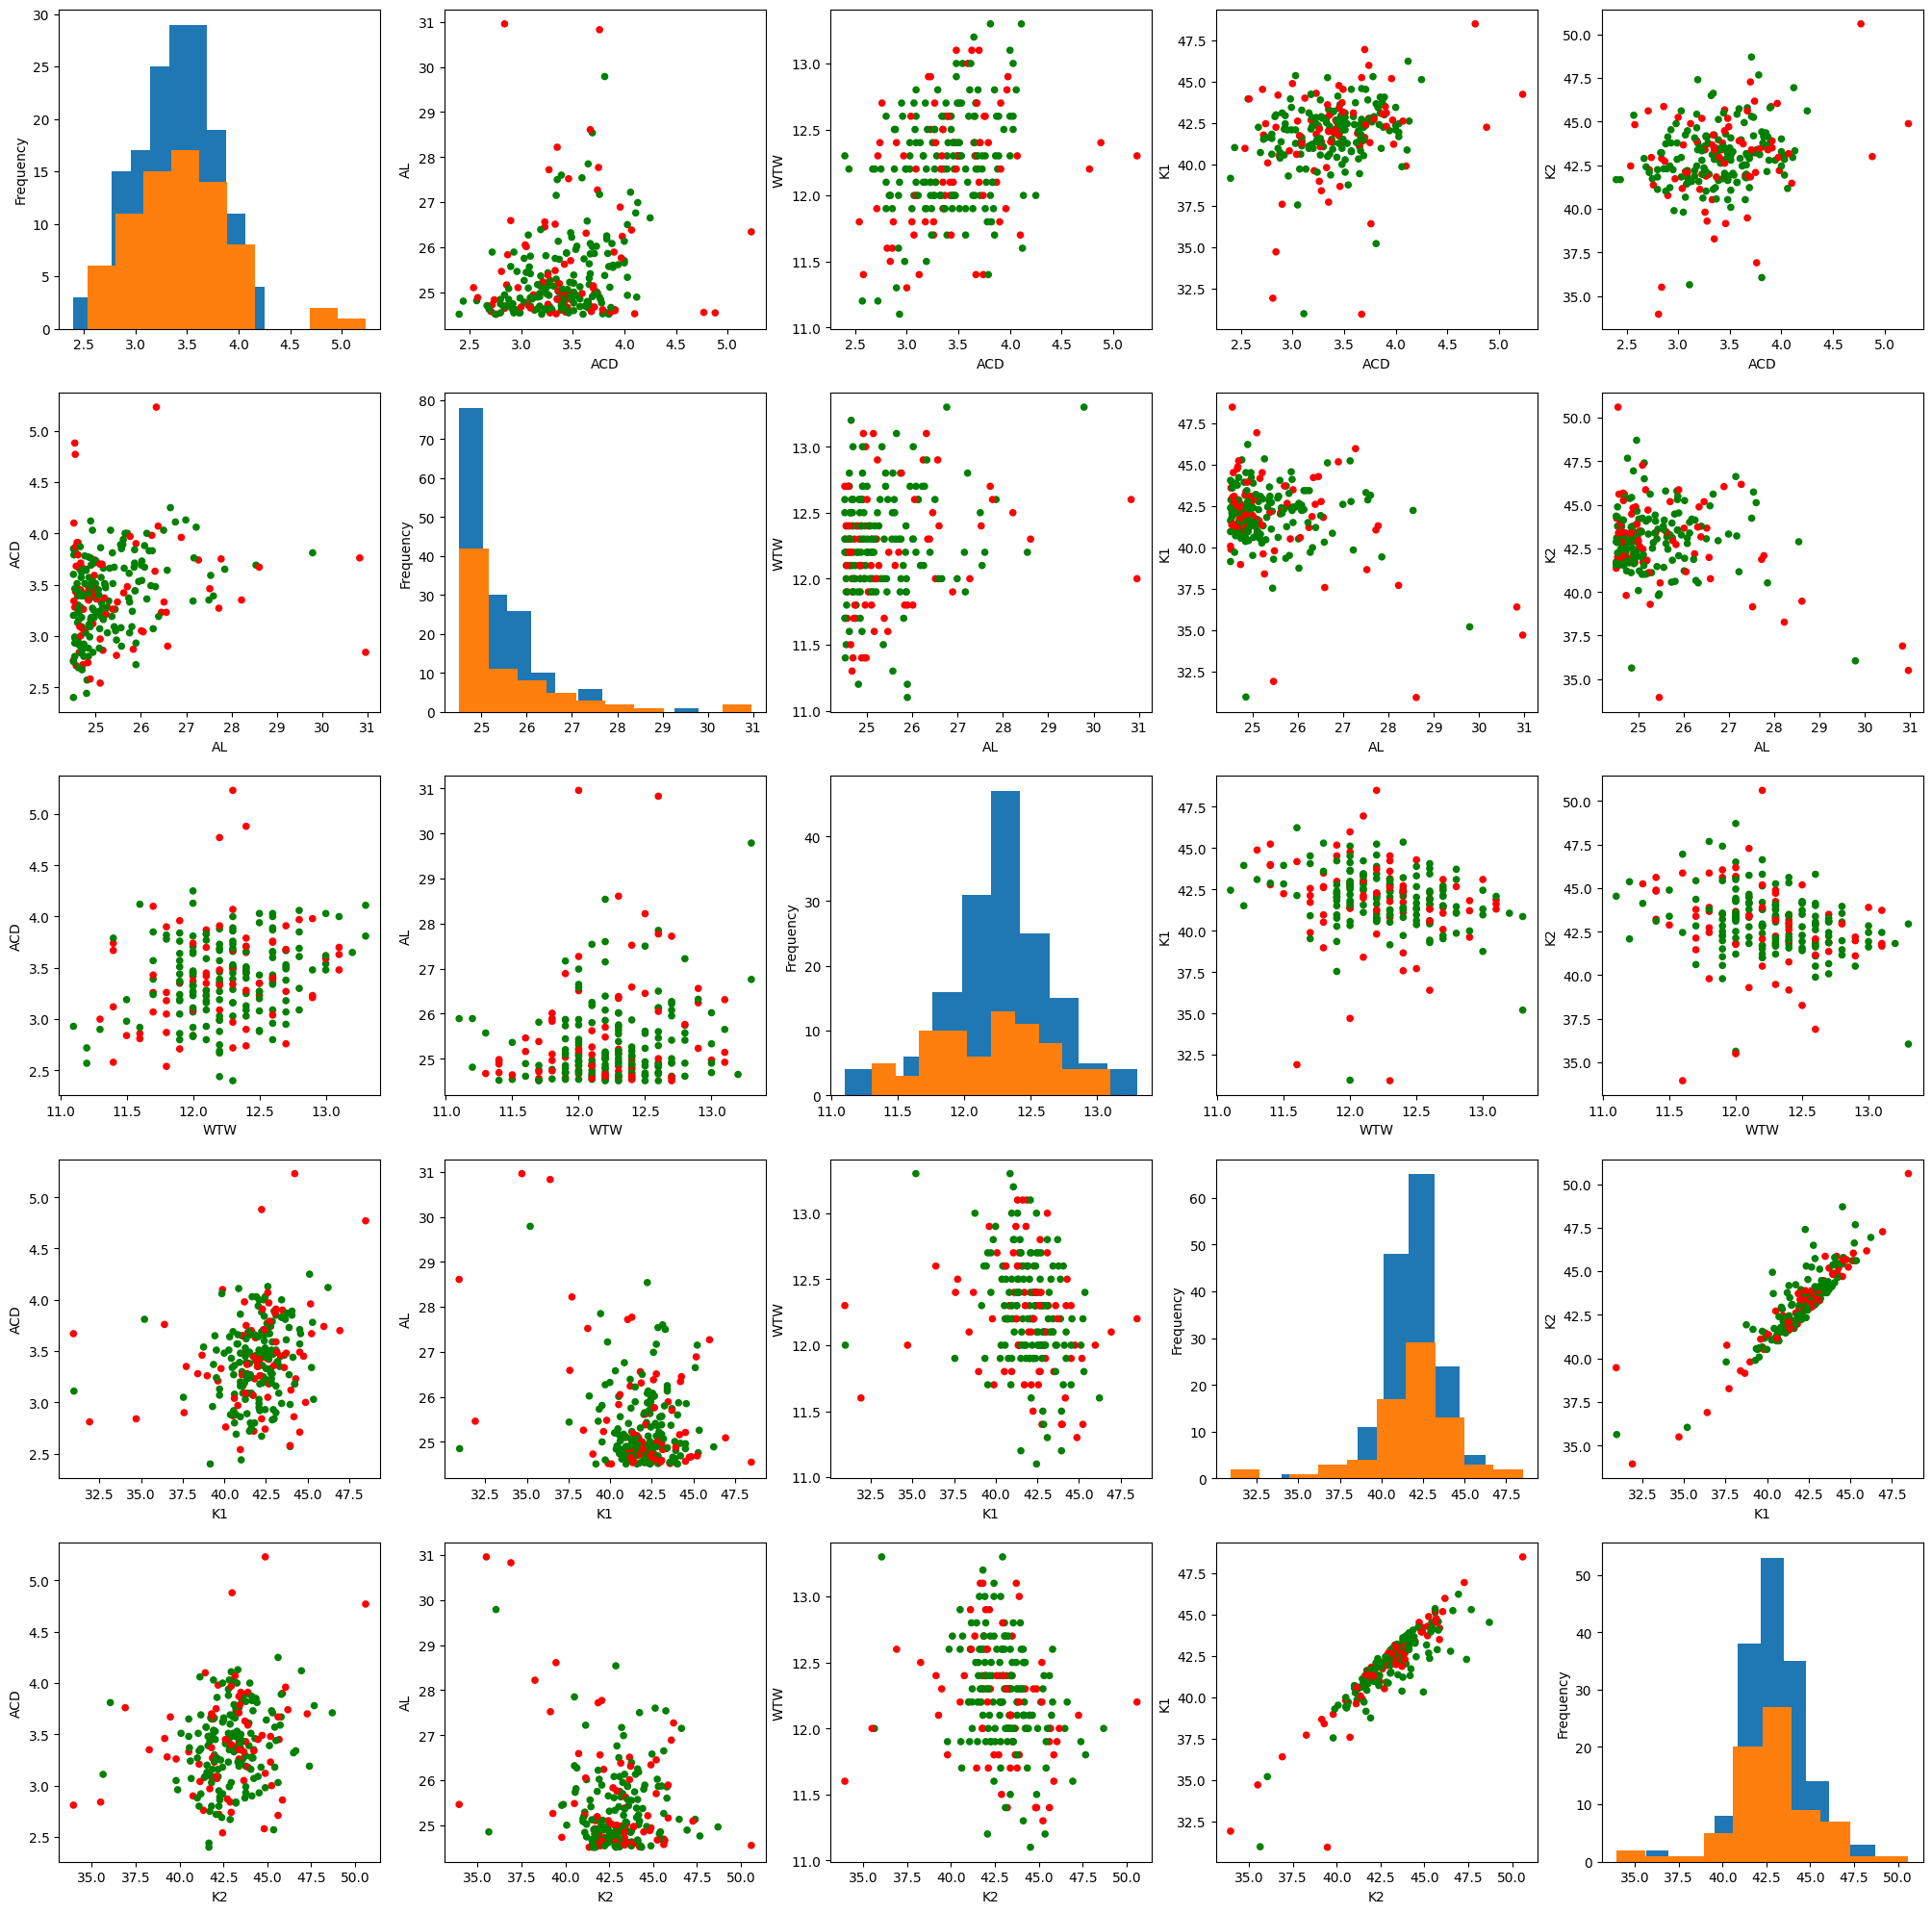

In [14]:
gs = GridSpec(nrows=len(columns), ncols=len(columns))
fig = plt.figure(figsize=(25, 25))
for idx, colum in enumerate(columns):
    for idx2, colum2 in enumerate(columns):
        if colum == colum2:
            ax = fig.add_subplot(gs[idx, idx2])
            df_2450[df_2450["Correto"] == 1][colum].plot.hist(ax=ax)
            df_2450[df_2450["Correto"] == 0][colum].plot.hist(ax=ax)
            pass
        else:
            ax = fig.add_subplot(gs[idx, idx2])
            df_2450.plot.scatter(x=colum, y=colum2, c=df_2450["Correto"].apply(lambda x: "green" if x else "red"), ax=ax)

In [15]:
#Just normalize
df[columns] = (df[columns]-df[columns].min())/(df[columns].max()-df[columns].min())

In [31]:
## writhe the evaluete method for the models
def evaluate(model, df, n_splits=5):
    results = []
    skf = StratifiedKFold(n_splits=n_splits)
    for train_index, test_index in skf.split(df[columns], df['Correto']):
        model.fit(df.iloc[train_index][columns], df.iloc[train_index]["Correto"])
        predict = model.predict_proba(df.iloc[test_index][columns])
        results.append(roc_auc_score(df.iloc[test_index]["Correto"], predict[:,1]))
    r = pd.Series(results)
    return r.mean(), r.std()

In [33]:
print("Test in full dataset:\n")
n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors)
eval = evaluate(model, df)
print("Test with K Neighbors Classifier set to 5 Neighbors: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}\n")

model = RandomForestClassifier()
eval = evaluate(model, df)
print("Test with Random Forest Classifier: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}\n")

model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10),
                    random_state=1, max_iter=20000, activation="relu")

eval = evaluate(model, df)
print("Test with MLP Classifier: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}")


Test in full dataset:

Test with K Neighbors Classifier set to 5 Neighbors: 
ROC AUC: 0.5135111147654441 +- 0.05792184927417841

Test with Random Forest Classifier: 
ROC AUC: 0.5320602524387612 +- 0.03533761708294759

Test with MLP Classifier: 
ROC AUC: 0.5246603739693023 +- 0.02574886627052403


In [40]:

print("Test in AL < 22:\n")
n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors)
eval = evaluate(model, df_2200)
print("Test with K Neighbors Classifier set to 5 Neighbors: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}\n")

model = RandomForestClassifier()
eval = evaluate(model, df_2200)
print("Test with Random Forest Classifier: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}\n")

model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10),
                    random_state=1, max_iter=20000, activation="relu")

eval = evaluate(model, df_2200)
print("Test with MLP Classifier: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}")

Test in AL < 22:

Test with K Neighbors Classifier set to 5 Neighbors: 
ROC AUC: 0.37193813131313136 +- 0.09875256505465822

Test with Random Forest Classifier: 
ROC AUC: 0.39387626262626263 +- 0.05024217414077135

Test with MLP Classifier: 
ROC AUC: 0.5019570707070706 +- 0.0445693210217426


In [41]:
print("Test in 22 < AL < 24.50:\n")
n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors)
eval = evaluate(model, df_2200_2450)
print("Test with K Neighbors Classifier set to 5 Neighbors: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}\n")

model = RandomForestClassifier()
eval = evaluate(model, df_2200_2450)
print("Test with Random Forest Classifier: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}\n")

model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10),
                    random_state=1, max_iter=20000, activation="relu")

eval = evaluate(model, df_2200_2450)
print("Test with MLP Classifier: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}")

Test in 22 < AL < 24.50:

Test with K Neighbors Classifier set to 5 Neighbors: 
ROC AUC: 0.5276803158306048 +- 0.04434856660475957

Test with Random Forest Classifier: 
ROC AUC: 0.5146754786639179 +- 0.019178957435944395

Test with MLP Classifier: 
ROC AUC: 0.4716593233356239 +- 0.05392361928292195


In [42]:
print("Test in AL > 24.50:\n")
n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors)
eval = evaluate(model, df_2450)
print("Test with K Neighbors Classifier set to 5 Neighbors: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}\n")

model = RandomForestClassifier()
eval = evaluate(model, df_2450)
print("Test with Random Forest Classifier: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}\n")

model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10),
                    random_state=1, max_iter=20000, activation="relu")

eval = evaluate(model, df_2450)
print("Test with MLP Classifier: ")
print(f"ROC AUC: {eval[0]} +- {eval[1]}")

Test in AL > 24.50:

Test with K Neighbors Classifier set to 5 Neighbors: 
ROC AUC: 0.4252491359447005 +- 0.09140299906494537

Test with Random Forest Classifier: 
ROC AUC: 0.4965941820276498 +- 0.130720465682567

Test with MLP Classifier: 
ROC AUC: 0.5299222350230416 +- 0.10827388512208821
